In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib

# Carregar o dataset
df = pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Verificar o tamanho do dataset
df.shape

(545, 13)

In [ ]:
#Verificar informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Criar um dataframe com dados incorretos
missssing_df = pd.DataFrame({
    'isnull': df.isnull().sum(), # verifica se existem valores nulos
    'isna': df.isna().sum(), # verifica se existem valores ausentes
    'duplicated': df[df.duplicated()].sum() # Verifica se existem linhas duplicadas
})
# Exibir o resultado
display(missssing_df)

,isnull,isna,duplicated
price,0,0,0
area,0,0,0
bedrooms,0,0,0
bathrooms,0,0,0
stories,0,0,0
mainroad,0,0,0
guestroom,0,0,0
basement,0,0,0
hotwaterheating,0,0,0
airconditioning,0,0,0


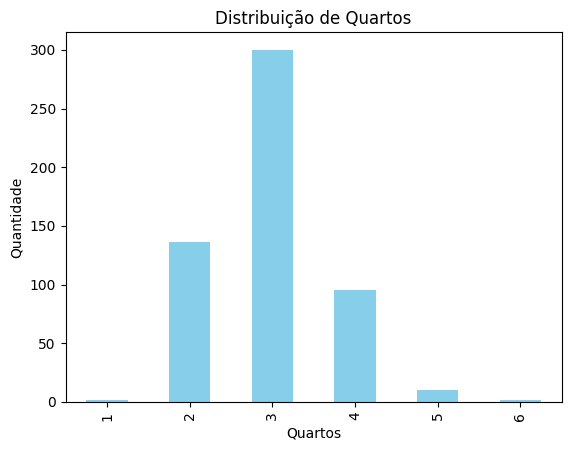

In [ ]:
# Criar um gráfico de barras com a contagem de casas por número de quartos
df['bedrooms'].value_counts(sort=False,).sort_index().plot(kind='bar', color='skyblue')

plt.title('Distribuição de Quartos')
plt.xlabel('Quartos')
plt.ylabel('Quantidade')
plt.show()

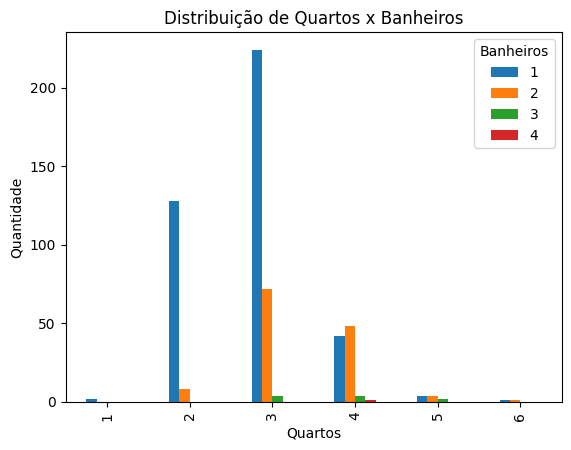

In [ ]:
# Criar uma tabela cruzada entre o número de quartos ('bedrooms') e banheiros ('bathrooms')
pd.crosstab(df['bedrooms'], df['bathrooms']).plot(kind='bar')# Gera um gráfico de barras com essa distribuição

plt.title('Distribuição de Quartos x Banheiros')
plt.legend(title='Banheiros')
plt.xlabel('Quartos')
plt.ylabel('Quantidade')
plt.show()


## Remoção de Outliers
A remoção de outliers é uma etapa fundamental na preparação de dados, especialmente em problemas de regressão como a previsão de preços de imóveis. Utilizando o método do intervalo interquartil (IQR), podemos identificar e eliminar valores extremos nas variáveis, como `price` e `area`, que fogem muito do padrão da maioria dos dados. Esses outliers, se não tratados, podem distorcer significativamente os resultados dos modelos preditivos, afetando métricas como o erro médio e o coeficiente de determinação (R²). Além de melhorar a performance dos modelos, a remoção de outliers também contribui para uma visualização mais clara e uma análise estatística mais confiável dos dados.


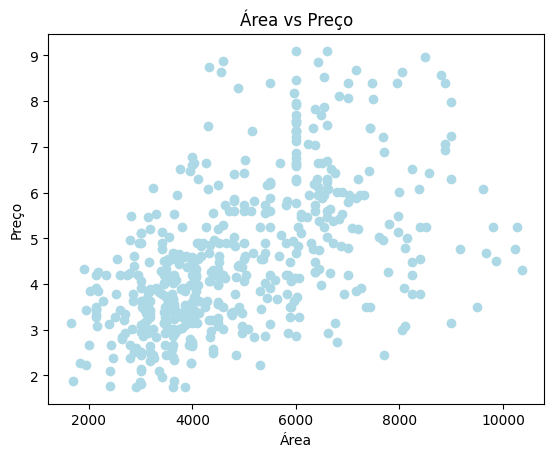

In [6]:
# Criar um gráfico de dispersão (scatter plot) com a área da casa no eixo X e o preço no eixo Y
# Cada ponto representa uma casa
plt.scatter(df['area'],
            df['price'],
            color='lightblue')

plt.xlabel('Área')
plt.ylabel('Preço')
plt.title('Área vs Preço')
plt.show()

In [2]:
# Cálcular o primeiro e terceiro quartis da variável 'price'
Q1 = df['price'].quantile(0.25)   # Primeiro quartil (25% dos dados abaixo)
Q3 = df['price'].quantile(0.75)   # Terceiro quartil (75% dos dados abaixo)

# Cálculo do intervalo interquartil (IQR)
IQR = Q3 - Q1                     # IQR = Q3 - Q1

# Filtra o DataFrame para remover os outliers de 'price'
# Mantém apenas os valores dentro do intervalo [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

# Repete o mesmo processo para a variável 'area'
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Remove os outliers da coluna 'area' com base no IQR
df = df[(df['area'] >= Q1 - 1.5 * IQR) & (df['area'] <= Q3 + 1.5 * IQR)]

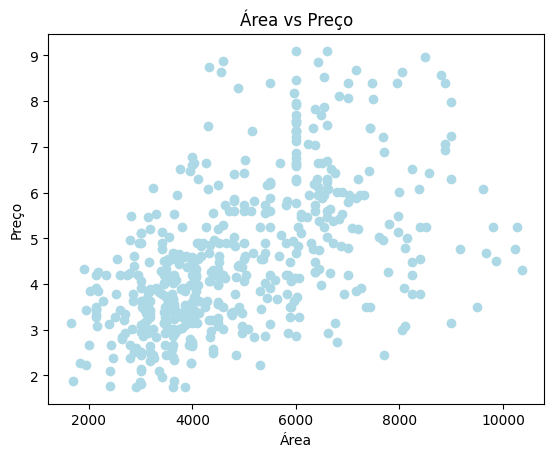

In [10]:
# Criar outro gráfico de dispersão, mas dessa vez sem os outlines
plt.scatter(df['area'],
            df['price'],
            color='lightblue')

plt.xlabel('Área')
plt.ylabel('Preço')
plt.title('Área vs Preço')
plt.show()

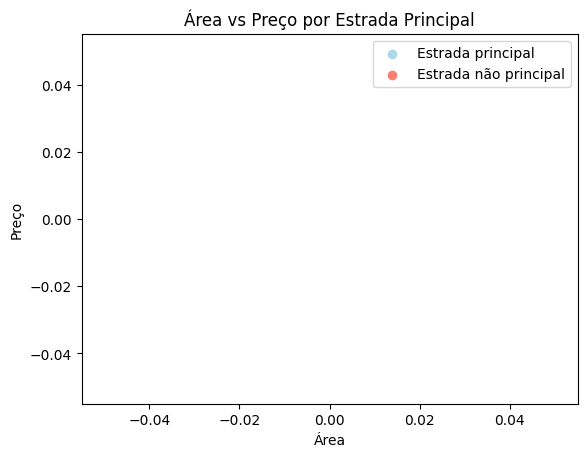

In [11]:
# Filtrar o DataFrame para obter apenas as casas localizadas em uma estrada principal
mainroad = df[df['mainroad'] == 'yes']

# Filtrar o DataFrame para obter apenas as casas NÃO localizadas em uma estrada principal
non_mainroad = df[df['mainroad'] == 'no']

# Criar um gráfico de dispersão para as casas localizadas em estrada principal
plt.scatter(mainroad['area'], mainroad['price'],
            color='lightblue',
            label='Estrada principal')

# Criar um gráfico de dispersão para as casas localizadas fora da estrada principal
plt.scatter(non_mainroad['area'], non_mainroad['price'],
            color='salmon',
            label='Estrada não principal')

# Rótulos e título
plt.xlabel('Área')
plt.ylabel('Preço')
plt.title('Área vs Preço por Estrada Principal')
plt.legend()
plt.show()

## Transformação de variáveis categóricas em numéricas
Transformar variáveis categóricas em numéricas é necessário para que modelos de machine learning possam trabalhar com os dados, já que esses modelos não conseguem interpretar texto diretamente.


In [3]:
# Definir uma lista com os nomes das colunas que possuem variáveis binárias (valores "yes" ou "no")
binary_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

# Para cada uma dessas colunas, aplica uma transformação:
# Substitui "yes" por 1 e "no" por 0, convertendo os valores de texto em valores numéricos binários
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({"yes": 1, "no": 0}))

# Criar um dicionário para mapear os valores categóricos de 'furnishingstatus' para valores numéricos
# 'furnished' será representado por 2, 'semi-furnished' por 1, e 'unfurnished' por 0
maping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
df['furnishingstatus'] = df['furnishingstatus'].map(maping)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,2
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [4]:
#Transformar preço em milhões para melhor legibilidade
df['price'] = df['price'] / 1e6
df['price'].head()

,price
15,9.100
16,9.100
17,8.960
18,8.890
19,8.855


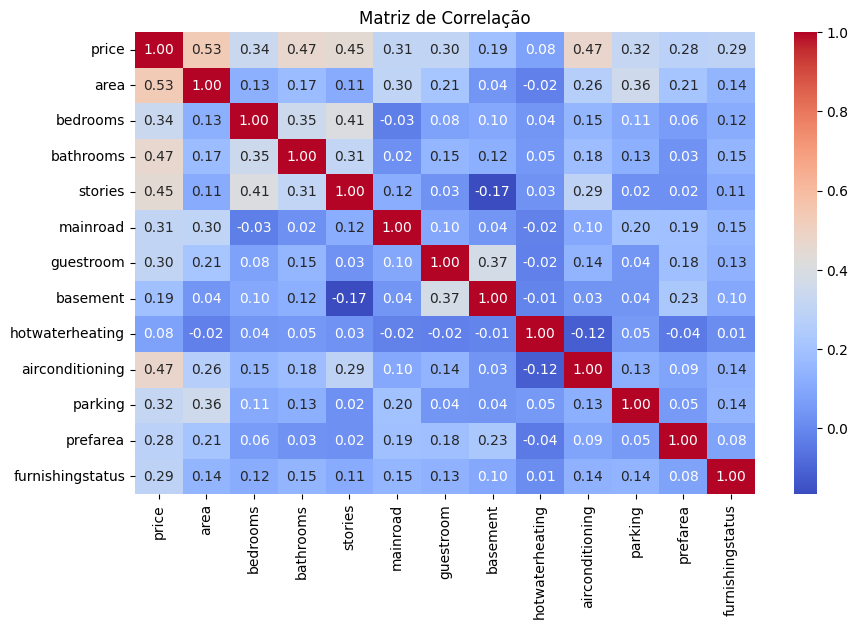

price               1.000000
area                0.533186
airconditioning     0.471706
bathrooms           0.466483
stories             0.446839
bedrooms            0.335328
parking             0.321058
mainroad            0.307185
guestroom           0.303994
furnishingstatus    0.291663
prefarea            0.280808
basement            0.190117
hotwaterheating     0.075979
Name: price, dtype: float64


In [5]:
# Calcular a matriz de correlação entre todas as variáveis numéricas do DataFrame
# A correlação indica o grau de associação entre pares de variáveis (varia de -1 a 1)
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
# Cria o mapa de calor (heatmap) da matriz de correlação
# - annot=True: exibe os valores numéricos dentro dos quadrados
# - cmap="coolwarm": define a paleta de cores (azul para correlação negativa, vermelho para positiva)
# - fmt=".2f": formata os valores numéricos com 2 casas decimais
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Seleciona apenas a correlação das variáveis com a coluna 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

## Modelos de Machine Learning

In [ ]:
# Separa as variáveis independentes (features) da variável dependente (target), que será usada no modelo de machine learning.
# X = todas as colunas, exceto 'price'
X = df.drop(columns=["price"])
# y = coluna alvo (price)
y = df["price"]

In [ ]:
# Separar o dataset em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regressão Linear

In [12]:
# Criar e treinar o modelo de Regressão Linear
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

# Previsões
y_pred_ln = ln_model.predict(X_test) # Usa o modelo treinado para prever os preços com base nos dados de teste

# Avaliação
mae = mean_absolute_error(y_test, y_pred_ln) # Calcula o erro médio absoluto
mse = mean_squared_error(y_test, y_pred_ln) # Calcula o erro quadrático médio
rmse = np.sqrt(mse) # Calcula a raiz do erro quadrático médio
r2 = r2_score(y_test, y_pred_ln) # Calcula o coeficiente de determinação (R²), que indica o quão bem o modelo explica a variação do alvo

print("Linear Regression Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

NameError: name 'LinearRegression' is not defined

Métricas:
- MAE (Mean Absolute Error): média dos erros absolutos (quanto o modelo erra, em média).

- MSE (Mean Squared Error): média dos quadrados dos erros (penaliza mais erros maiores).

- RMSE: raiz quadrada do MSE (traz o erro para a mesma escala do target).

- R²: mede a proporção da variância explicada pelo modelo (quanto mais perto de 1, melhor)

### Lasso

In [ ]:
# Instanciar o modelo com um valor de alpha (quanto maior, mais forte a regularização)
lasso = Lasso(alpha=0.1)

# Treinar o modelo com os dados de treino
lasso.fit(X_train, y_train)

# Fazer previsões com o modelo
y_pred_lasso = lasso.predict(X_test)

# Avaliar o desempenho
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

# Exibe as métricas
print("Lasso Metrics:")
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.85
MSE: 1.22
RMSE: 1.10
R²: 0.59


In [ ]:
coeficientes = pd.Series(lasso.coef_, index=X_train.columns)
print(coeficientes)

area                0.000321
bedrooms            0.052025
bathrooms           0.767966
stories             0.398338
mainroad            0.000000
guestroom           0.000000
basement            0.196467
hotwaterheating     0.000000
airconditioning     0.425323
parking             0.167555
prefarea            0.176355
furnishingstatus    0.170733
dtype: float64


In [ ]:
# Define os valores de alpha que serão testados
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

# Cria o modelo base do Lasso
lasso = Lasso()

# Cria o objeto do GridSearchCV
grid_lasso = GridSearchCV(estimator=lasso,
                          param_grid=param_grid,
                          scoring='r2',      # ou 'neg_mean_squared_error'
                          cv=5,              # 5-fold cross-validation
                          n_jobs=-1)

# Treina com os dados de treino
grid_lasso.fit(X_train, y_train)

# Melhor modelo encontrado
best_lasso = grid_lasso.best_estimator_

# Faz predições com o melhor modelo
y_pred_lasso = best_lasso.predict(X_test)

# Avalia o modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_lasso)

# Exibe os resultados
print("Melhor alpha:", grid_lasso.best_params_['alpha'])
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

Melhor alpha: 0.01
MAE: 0.75
MSE: 0.98
RMSE: 0.99
R²: 0.67


In [ ]:
# Isso mostra quanto cada variável impacta o preço:
coeficientes = pd.DataFrame({
    "Variável": X.columns,
    "Coeficiente": ln_model.coef_
}).sort_values(by="Coeficiente", ascending=False)

print(coeficientes)

            Variável  Coeficiente
8    airconditioning     0.856377
7    hotwaterheating     0.715671
2          bathrooms     0.708587
10          prefarea     0.504921
3            stories     0.457939
5          guestroom     0.409042
4           mainroad     0.383892
6           basement     0.321023
9            parking     0.220720
11  furnishingstatus     0.143432
1           bedrooms     0.105671
0               area     0.000247


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Treinar o modelo de árvore de decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Fazer previsões
y_pred_tree = tree_model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Decision Tree:
MAE: 1.02
MSE: 1.82
RMSE: 1.35
R²: 0.38


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Random Forest:
MAE: 0.76
MSE: 1.06
RMSE: 1.03
R²: 0.64


In [ ]:
from sklearn.model_selection import GridSearchCV
# Grade de parâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
# Modelo base
rf = RandomForestRegressor(random_state=42)

# GridSearch com validação cruzada
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

# Ajustar o modelo com os dados de treino
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = grid_search.best_estimator_

# Previsões
y_pred_rf = best_rf.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Melhores hiperparâmetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 0.75
MSE: 0.98
RMSE: 0.99
R²: 0.67


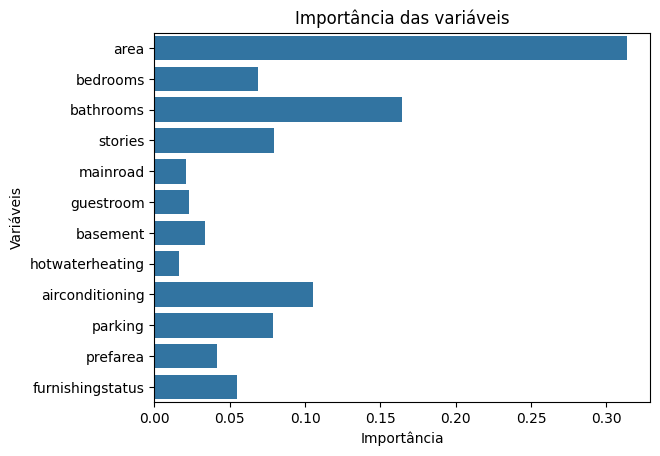

In [ ]:
#Visualizar importância das variáveis (Random Forest faz isso bem!):
importances = best_rf.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.title("Importância das variáveis")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()

In [ ]:
import joblib

# Salvar o melhor modelo Random Forest treinado
joblib.dump(best_rf, 'random_forest_best_model.joblib')

['random_forest_best_model.joblib']

In [ ]:
# Exemplo: um novo imóvel para prever
dados_novos = pd.DataFrame([{
    'area': 3000,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'mainroad': 1,          # Sim
    'guestroom': 0,         # Não
    'basement': 1,          # Sim
    'hotwaterheating': 0,   # Não
    'airconditioning': 1,   # Sim
    'parking': 2,
    'prefarea': 1,          # Sim
    'furnishingstatus': 2   # Fully Furnished → codificado como 2
}])

In [ ]:
# Previsão
preco_previsto = best_rf.predict(dados_novos)

print(f"Preço previsto: {preco_previsto[0]:.2f}")

Preço previsto: 5.37
